In [39]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch    
import torch.nn as nn
import torch.nn.functional as F

#set figure size
sns.set(rc={'figure.figsize':(10,5)})
#darkgrid, whitegrid, dark, white, and ticks
sns.set_style("darkgrid")

In [40]:
df = pd.read_csv(r'D:\vscode_workspace\PracticeLab\IMU_concat2.txt', sep='\t', header = 0)

df.shape

(1352580, 8)

In [24]:
df_1 = pd.read_csv(r'D:\个人文档\各种文档\04-快走-1.calc', header=2, delim_whitespace=True)

print(df_1.shape)

(3072, 946)


In [54]:
df_1.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,...,59-Q-s,59-Q-x,59-Q-y,59-Q-z,59-A-x,59-A-y,59-A-z,59-W-x,59-W-y,59-W-z
0,1.1110,0.3511,0.8498,0.0008,0.0072,-2.8863,0.7354,0.0045,0.0034,0.6776,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.1109,0.3512,0.8500,-0.0054,0.0063,-2.8861,0.7355,0.0045,0.0034,0.6775,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.1108,0.3514,0.8502,-0.0006,0.0020,-2.8867,0.7355,0.0045,0.0033,0.6776,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.1107,0.3516,0.8504,-0.0016,0.0087,-2.8869,0.7355,0.0045,0.0033,0.6776,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.1106,0.3518,0.8506,-0.0023,0.0081,-2.8858,0.7355,0.0045,0.0033,0.6776,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_1 = pd.read_csv(r'D:\vscode_workspace\PracticeLab\IMU\code\dataset\UCI HAR Dataset\train\Inertial Signals\body_acc_x_train.txt', header=None, delim_whitespace=True)

df_1.shape

# df_1 = pd.read_csv(r'D:\vscode_workspace\PracticeLab\IMU\code\dataset\UCI HAR Dataset\train\X_train.txt', header=None, delim_whitespace=True)

# print(df_1.shape)

# df_1.head(3)

(7352, 128)

In [41]:
df = df.sort_values(by = ['user'], ignore_index=True)

# train data -> Users upto User ID = 3 (i.e. 3 users)
df_train = df[df['user'] <= 3]
# test data -> Users ID = 4 (i.e. 1 users)
df_test = df[df['user'] > 3]

In [42]:
trainy = df_train.type
testy = df_test.type

In [43]:
trainX = df_train.drop(labels='type', axis=1)
testX = df_test.drop(labels='type', axis=1)
trainX = trainX.drop(labels='user', axis=1)
testX = testX.drop(labels='user', axis=1)

In [44]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((1003788, 6), (1003788,), (348792, 6), (348792,))

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# np.unique(label_encoder.fit_transform(df_train.type))
# label_encoder.fit_transform(df_test.type)

trainy = label_encoder.fit_transform(df_train.type)
testy = label_encoder.fit_transform(df_test.type)

In [46]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((1003788, 6), (1003788,), (348792, 6), (348792,))

In [ ]:
# index_list = list()

for i in trainX.columns:
    column = trainX.loc[:, i]
    # if len(index_list) == 0:
    index_list = index_list.append(column)
    # else:
    #     index_list = np.hstack(column)

print(len(index_list))
print(np.dstack(np.array(index_list)).shape)

In [18]:
np.dstack(np.array(trainX)).shape

(1, 6, 1003788)

In [29]:
trainX.loc[:, trainX.columns[0]]

0         -0.3320
1         -0.1172
2         -0.1172
3         -0.1133
4         -0.1133
            ...  
1003783    0.0000
1003784    0.0000
1003785    0.1571
1003786    0.0175
1003787    0.0524
Name: A-x, Length: 1003788, dtype: float64

In [31]:
trainX.loc[:, 'A-x']

0         -0.3320
1         -0.1172
2         -0.1172
3         -0.1133
4         -0.1133
            ...  
1003783    0.0000
1003784    0.0000
1003785    0.1571
1003786    0.0175
1003787    0.0524
Name: A-x, Length: 1003788, dtype: float64

In [35]:
index_list = list()

for i in trainX.columns:
    column = trainX.loc[:, i]
    index_list.append(column)

print(len(index_list))
print(np.array(trainX).T.shape)
print(np.array(index_list).shape)
print(np.dstack(np.array(index_list)).shape)

6
(6, 1003788)
(6, 1003788)
(1, 1003788, 6)


In [36]:
print(np.array(trainX).T.reshape(np.array(trainX).T.shape[0], np.array(trainX).T.shape[1], 1).shape)

(6, 1003788, 1)


In [17]:
np.hstack(np.array(trainX)).shape

(6022728,)

In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# load a single file as a numpy array
# def load_file(filepath):
#     dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
#     return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
# def load_group(filenames, prefix=''):
#     # group train, test
#     # prefix -> 'D:/vscode_workspace/PracticeLab/IMU/code/dataset/UCI HAR Dataset/group/Inertial Signals/'
#     loaded = list()
#     for name in filenames:
#         data = load_file(prefix + name)
#         loaded.append(data)
#     # stack group so that features are the 3rd dimension
#     loaded = np.dstack(loaded)
#     print('loaded.shape:', loaded.shape)
#     return loaded  # loaded.shape: (7352, 128, 9)

# load a dataset group, such as train or test
# def load_dataset_group(group, prefix=''):
#     # prefix -> 'D:/vscode_workspace/PracticeLab/IMU/code/dataset/UCI HAR Dataset/'
#     # group train, test
#     filepath = prefix + group + '/Inertial Signals/' # get the signals path
#     # load all 9 files as a single array
#     filenames = list()
#     # total acceleration
#     filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
#     # body acceleration
#     filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']
#     # body gyroscope
#     filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']
#     # filenames save all signals' filename
#     # load input data
#     X = load_group(filenames, filepath) # loaded.shape: (7352, 128, 9) train,   loaded.shape: (2947, 128, 9)  test
#     # load class output
#     y = load_file(prefix + group + '/y_' + group + '.txt') # y_train.txt, y_test.txt
#     return X, y # X_train y_train;  X_test, y_test

def to_categorical(y, num_classes=None, dtype='float32'):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.
    # Example
    ```python
    # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
    > labels
    array([0, 2, 1, 2, 0])
    # `to_categorical` converts this into a matrix with as many
    # columns as there are classes. The number of rows
    # stays the same.
    > to_categorical(labels)
    array([[ 1.,  0.,  0.],
           [ 0.,  0.,  1.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  1.],
           [ 1.,  0.,  0.]], dtype=float32)
    ```
    """

    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

# load the dataset, returns train and test X and y elements
# prefix -> 'D:/vscode_workspace/PracticeLab/IMU/code/dataset/UCI HAR Dataset/'
def load_dataset(prefix=''):
    df = pd.read_csv(r'D:\vscode_workspace\PracticeLab\IMU_concat2.txt', sep='\t', header = 0)
    df = df.sort_values(by = ['user'], ignore_index=True)
    # train data -> Users upto User ID = 3 (i.e. 3 users)
    df_train = df[df['user'] <= 3]
    # test data -> Users ID = 4 (i.e. 1 users)
    df_test = df[df['user'] > 3]
    trainy = df_train.type
    testy = df_test.type
    trainX = df_train.drop(labels='type', axis=1)
    testX = df_test.drop(labels='type', axis=1)
    trainX = trainX.drop(labels='user', axis=1)
    testX = testX.drop(labels='user', axis=1)

    print('before dstack')
    print(trainX.shape, trainy.shape)

    # trainX = np.array(trainX)
    # testX = np.array(testX)
    trainX = np.array(trainX).reshape(trainX.shape[1], trainX.shape[0], 1)
    testX = np.array(testX)

    trainX = np.dstack(trainX)
    trainy = np.dstack(trainy)
    print('after dstack')
    print(trainX.shape, trainy.shape)

    # testX = np.dstack(testX)
    # testy = np.dstack(testy)
    testX = testX.reshape(testX.shape[0], -1)
    testy = np.array(testy).reshape(testy.shape[0], -1)

    label_encoder = LabelEncoder()
    trainy = label_encoder.fit_transform(df_train.type)
    testy = label_encoder.fit_transform(df_test.type)   
    
    # load all train
    # trainX, trainy = load_dataset_group('train', prefix)
    # print(trainX.shape, trainy.shape)
    # load all test
    # testX, testy = load_dataset_group('test', prefix)
    # print(testX.shape, testy.shape)
    # zero-offset class values
    # trainy = trainy - 1
    # testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print('loading')
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

# load data set and split into training and testing inputs (X) and outputs (y)
# trainX, trainy, testX, testy = load_dataset('D:/vscode_workspace/PracticeLab/IMU/code/dataset/UCI HAR Dataset/')
trainX, trainy, testX, testy = load_dataset()
print('after load:')
print(trainX.shape, trainy.shape, testX.shape, testy.shape)

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

# define the model using pytorch
class ConvNet1D(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(n_features, 64, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool1d(10))
        self.layer2 = nn.Flatten()
        self.layer3 = nn.Sequential(
            nn.Linear(768,100),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            # nn.Linear(100,6),
            nn.Linear(100,4),
            nn.Softmax())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        return out

model = ConvNet1D()
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
# total_step = len(trainX)
total_step = trainX.shape[2]
print(trainX.shape)

# transformation of data into torch tensors
trainXT = torch.from_numpy(trainX)
trainXT = trainXT.transpose(1,2).float() #input is (N, Cin, Lin) = Ntimesteps, Nfeatures, 128
trainyT = torch.from_numpy(trainy).float()
testXT = torch.from_numpy(testX)
testXT = testXT.transpose(1,2).float()
testyT = torch.from_numpy(testy).float()
num_epochs = 50
batch_size = 98

loss_list = []
acc_list = []
acc_list_epoch = []
for epoch in range(num_epochs):
    correct_sum = 0
    for i in range(int(np.floor(total_step/batch_size))): # split data into batches
        trainXT_seg = trainXT[i*batch_size:(i+1)*batch_size]
        trainyT_seg = trainyT[i*batch_size:(i+1)*batch_size]
        # Run the forward pass
        outputs = model(trainXT_seg)
        loss = criterion(outputs, torch.max(trainyT_seg, 1)[1])
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = trainyT_seg.size(0)
        _, predicted = torch.max(outputs, 1)
        _, actual = torch.max(trainyT_seg, 1)
        correct = (predicted == actual).sum().item()
        correct_sum = correct_sum + (correct/total)
        acc_list.append(correct / total)
    print("Epoch")
    print(epoch)
    print("accuracy")
    accuracy = correct_sum/int(np.floor(total_step/batch_size))
    print(accuracy)
    # print(correct_sum/int(np.floor(total_step/batch_size)))
    acc_list_epoch.append(correct_sum/int(np.floor(total_step/batch_size)))
    # acc_list_epoch.append(correct_sum/int(np.ceil(total_step/batch_size)))

#plot the training accuracy
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(acc_list_epoch)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(testXT)
    _, predictedt = torch.max(test_outputs, 1)
    _, actual = torch.max(testyT, 1)
    total_t = testyT.size(0)
    correct_t = (predictedt == actual).sum().item()
    print('Test accuracy:')
    print((correct_t/total_t)*100)

before dstack
(1003788, 6) (1003788,)
after dstack
(1003788, 1, 6) (1, 1, 1003788)
loading
(1003788, 1, 6) (1003788, 4) (348792, 6) (348792, 4)
after load:
(1003788, 1, 6) (1003788, 4) (348792, 6) (348792, 4)
(1003788, 1, 6)


IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [4]:
arr = np.array([[1, 2, 3], [2, 4, 5]])

np.dstack(arr)

array([[[1, 2],
        [2, 4],
        [3, 5]]])

#### np.dstack
按深度顺序堆叠arrays。当数组为2维数组(M,N)或1维数组(N,)时，</br>
首先分别将其维度改变为(M,N,1)、(1,N,1)，然后沿着第三根轴(r/g/b通道)进行拼接。

In [15]:
# 一维
a = np.array([1, 2])
b = np.array([3, 4])
print(np.dstack((a,b)))
 
# 二维
a = np.array([[1, 1],
              [2, 2],
              [3, 3]])
b = np.array([[4, 4],
              [5, 5],
              [6, 6]])
print('-------------------------')
print(np.dstack((a,b)))
print(np.dstack((a,b)).shape)

[[[1 3]
  [2 4]]]
-------------------------
[[[1 4]
  [1 4]]

 [[2 5]
  [2 5]]

 [[3 6]
  [3 6]]]
(3, 2, 2)


#### np.hstack()
水平方向（列）顺序堆叠arrays。

In [11]:
import numpy as np
 
# 一维
a = np.array([1, 2])
b = np.array([3, 4])
print(np.hstack((a,b)))
 
# 二维
a = np.array([[1, 1],
              [2, 2],
              [3, 3]])
b = np.array([[4, 4],
              [5, 5],
              [6, 6]])
print(np.hstack((a,b)))
print(np.hstack((a,b)).shape)

[1 2 3 4]
[[1 1 4 4]
 [2 2 5 5]
 [3 3 6 6]]
(3, 4)


#### np.vstack()
垂直方向（行）顺序堆叠arrays。

In [7]:
# 一维
a = np.array([1, 2])
b = np.array([3, 4])
print(np.vstack((a,b)))
 
# 二维
a = np.array([[1, 1],
              [2, 2],
              [3, 3]])
b = np.array([[4, 4],
              [5, 5],
              [6, 6]])
print(np.vstack((a,b)))

[[1 2]
 [3 4]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]


In [37]:
np.floor(1/98)

0.0

In [39]:
np.ceil(1/98)

1.0

In [34]:
print("test:{}".format(trainX.shape))

test:(1003788, 6)


dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
dataframe.shape:(7352, 128)
load_group before dstack:(9, 7352, 128)
load_group after dstack:(7352, 128, 9)
dataframe.shape:(7352, 1)
line 42, y:(7352, 1)
line 91,after load_dataset_group train x,y shape:(7352, 128, 9),(7352, 1)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
dataframe.shape:(2947, 128)
load_group before dstack:(9, 2947, 128)
load_group after dstack:(2947, 128, 9)
dataframe.shape:(2947, 1)
line 42, y:(2947, 1)
line 94,after load_dataset_group test x,y shape:(2947, 128, 9),(2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>

d:\python\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 0
accuracy: 0.6027565502183406
Epoch: 1
accuracy: 0.767603711790393
Epoch: 2
accuracy: 0.8388373362445415
Epoch: 3
accuracy: 0.8751364628820961
Epoch: 4
accuracy: 0.9055676855895196
Epoch: 5
accuracy: 0.9059770742358079
Epoch: 6
accuracy: 0.9245360262008734
Epoch: 7
accuracy: 0.9358624454148472
Epoch: 8
accuracy: 0.9429585152838428
Epoch: 9
accuracy: 0.9425491266375546
Epoch: 10
accuracy: 0.9001091703056768
Epoch: 11
accuracy: 0.9455513100436681
Epoch: 12
accuracy: 0.9463700873362445
Epoch: 13
accuracy: 0.9496451965065502
Epoch: 14
accuracy: 0.9531932314410481
Epoch: 15
accuracy: 0.9542849344978166
Epoch: 16
accuracy: 0.9537390829694323
Epoch: 17
accuracy: 0.9531932314410481
Epoch: 18
accuracy: 0.9515556768558951
Epoch: 19
accuracy: 0.9552401746724891
Epoch: 20
accuracy: 0.863400655021834
Epoch: 21
accuracy: 0.9072052401746725
Epoch: 22
accuracy: 0.9480076419213974
Epoch: 23
accuracy: 0.9443231441048034
Epoch: 24
accuracy: 0.9516921397379913
Epoch: 25
accuracy: 0.949372270742358

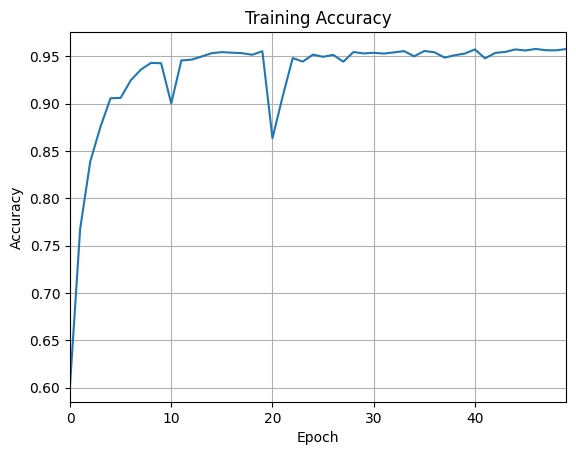

Test accuracy: 87.71632168306752


In [46]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# load a single file as a numpy array
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    print("dataframe.shape:{}".format(dataframe.shape))
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    print('load_group before dstack:{}'.format(np.shape(loaded)))
    loaded = np.dstack(loaded)
    print('load_group after dstack:{}'.format(np.shape(loaded)))
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_' + group + '.txt')
    print("line 42, y:{}".format(y.shape))
    return X, y

def to_categorical(y, num_classes=None, dtype='float32'):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.
    # Example
    ```python
    # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
    > labels
    array([0, 2, 1, 2, 0])
    # `to_categorical` converts this into a matrix with as many
    # columns as there are classes. The number of rows
    # stays the same.
    > to_categorical(labels)
    array([[ 1.,  0.,  0.],
           [ 0.,  0.,  1.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  1.],
           [ 1.,  0.,  0.]], dtype=float32)
    ```
    """

    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix)
    print('line 91,after load_dataset_group train x,y shape:{},{}'.format(trainX.shape, trainy.shape))
    # load all test
    testX, testy = load_dataset_group('test', prefix)
    print('line 94,after load_dataset_group test x,y shape:{},{}'.format(testX.shape, testy.shape))
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    print(type(trainy), type(testy))
    return trainX, trainy, testX, testy

# load data set and split into training and testing inputs (X) and outputs (y)
trainX, trainy, testX, testy = load_dataset('D:/vscode_workspace/PracticeLab/IMU/code/dataset/UCI HAR Dataset/')

print("after load_dataset, shape of all: {} {} {} {}".format(trainX.shape, trainy.shape, testX.shape, testy.shape))

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

# define the model using pytorch
class ConvNet1D(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(n_features, 64, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool1d(10))
        self.layer2 = nn.Flatten()
        self.layer3 = nn.Sequential(
            nn.Linear(768,100),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(100,6),
            nn.Softmax())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        return out

model = ConvNet1D()
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
total_step = len(trainX)
print("shape of all: {} {} {} {}".format(trainX.shape, trainy.shape, testX.shape, testy.shape))

# transformation of data into torch tensors
trainXT = torch.from_numpy(trainX)
trainXT = trainXT.transpose(1,2).float() #input is (N, Cin, Lin) = Ntimesteps, Nfeatures, 128
trainyT = torch.from_numpy(trainy).float()
testXT = torch.from_numpy(testX)
testXT = testXT.transpose(1,2).float()
testyT = torch.from_numpy(testy).float()
print("trainXT.shape: {}, trainyT.shape: {}, testXT.shape:{}, testyT.shape:{}".format(trainXT.shape, trainyT.shape, testXT.shape, testyT.shape))

num_epochs = 50
batch_size = 32

loss_list = []
acc_list = []
acc_list_epoch = []
for epoch in range(num_epochs):
    correct_sum = 0
    for i in range(int(np.floor(total_step/batch_size))): # split data into batches
        trainXT_seg = trainXT[i*batch_size:(i+1)*batch_size]
        trainyT_seg = trainyT[i*batch_size:(i+1)*batch_size]
        # Run the forward pass
        outputs = model(trainXT_seg)
        loss = criterion(outputs, torch.max(trainyT_seg, 1)[1])
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = trainyT_seg.size(0)
        _, predicted = torch.max(outputs, 1)
        _, actual = torch.max(trainyT_seg, 1)
        correct = (predicted == actual).sum().item()
        correct_sum = correct_sum + (correct/total)
        acc_list.append(correct / total)
    print("Epoch: {}".format(epoch))
    print("accuracy: {}".format(correct_sum/int(np.floor(total_step/batch_size))))
    acc_list_epoch.append(correct_sum/int(np.floor(total_step/batch_size)))

#plot the training accuracy
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(acc_list_epoch)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(testXT)
    _, predictedt = torch.max(test_outputs, 1)
    _, actual = torch.max(testyT, 1)
    total_t = testyT.size(0)
    correct_t = (predictedt == actual).sum().item()
    print('Test accuracy: {}'.format((correct_t/total_t)*100))

------------------------------------------------------------------------------------------------------------

In [37]:
# torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)

# in_channels: 输入的通道数
# out_channels:输出的通道数
# kernel_size:卷积核的大小
# stride:每次移动卷积核的间距
# padding:每个边padding的元素数
# dilation:空洞卷积的参数
# groups:分组卷积的组数

conv1 = nn.Conv1d(in_channels=256, out_channels=100, kernel_size=2)

# 输出的特征
input = torch.randn(32, 35, 256)
# 加padding是为了让卷积之后的时间维度不变
padding = nn.ConstantPad2d((1, 0, 0, 0,), 0)
# 由于一维卷积是对最后一维操作的，所以得转置后面两维
input = input.transpose(2, 1)
# 先转置，后padding，这样padding就加在了时间维度了
input = padding(input)
# 卷积之后还得恢复到原来的维度
output = conv1(input).transpose(2, 1)
print(output.shape)   # torch.Size([32, 35, 100])

torch.Size([32, 35, 100])


In [47]:
import pandas as pd
df1 = pd.read_csv(r'D:\vscode_workspace\PracticeLab\IMU\code\dataset\UCI HAR Dataset\test\Inertial Signals\total_acc_z_test.txt', header=None, delim_whitespace=True)
# df1 = pd.read_csv(r'D:\vscode_workspace\PracticeLab\IMU_concat2.txt', header=0, sep='\t')

print(df_1.shape)

(2947, 128)


In [24]:
df_1.head(3)

,A-x,A-y,A-z,W-x,W-y,W-z,user,type
0,-0.3320,1.1172,0.1133,-2.8099,-1.6406,0.5236,1,up stairs
1,-0.1016,0.9063,-0.1094,-2.7925,-2.1118,0.6632,1,up stairs
2,0.1328,0.8359,-0.1133,-2.5132,-2.5656,0.6981,1,up stairs


In [25]:
df1.values[0:3]

array([[-0.332, 1.1172, 0.1133, -2.8099, -1.6406, 0.5236, 1, 'up stairs'],
       [-0.1016, 0.9063, -0.1094, -2.7925, -2.1118, 0.6632, 1,
        'up stairs'],
       [0.1328, 0.8359, -0.1133, -2.5132, -2.5656, 0.6981, 1,
        'up stairs']], dtype=object)

In [33]:
t_list = list()

t_list.append(df1.type[0:3])
t_list.append(df1.type[3:6])

print(np.shape(t_list))
len(t_list)

(2, 3)


2

In [35]:
t_list = list()

t_list.append(df1['type'].values[0:3])
t_list.append(df1['type'].values[3:6])
print(np.shape(t_list))

len(t_list)

(2, 3)


2

In [43]:
np.array(t_list).squeeze(-1)

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [ ]:
import numpy as np
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_train ,df_test = train_test_split(df1, test_size=0.3, random_state=42)

label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(df_train.type)
# y_test = label_encoder.fit_transform(df_test.type)

# y_train, y_test, df_train.shape, y_train.shape, df_test.shape, y_test.shape

X_train_list = list()
X_test_list = list()
y_train_list = list()
y_test_list = list()

train_labels = []
test_labels = []

window_size = 96
step_size = 48 # 50% overlaped

# creating overlaping windows of size window-size 100
for i in range(0, df_train.shape[0] - window_size, step_size):
    xlist = pd.DataFrame(df_train.values[i: i + 96])
    # W_xs = df_train['W-x'].values[i: i + 96]
    # train_label = stats.mode(df_train['type'][i: i + 96])[0][0]
    train_label = pd.DataFrame(df_train['type'][i: i + 96])

    X_train_list.append(xlist)
    train_labels.append(train_label)

In [ ]:
for i in range(0, df_test.shape[0] - window_size, step_size):
    xlist = df_test.values[i: i + 96].values
    # W_xs = df_train['W-x'].values[i: i + 96]
    test_label = stats.mode(df_test['type'][i: i + 96])[0][0]

    X_test_list.append(xlist)
    test_labels.append(test_label)

np.shape(X_train_list), np.shape(y_train_list), np.shape(X_test_list), np.shape(y_test_list)

In [10]:
df1.columns

df_y = df1['type']
df2 = df1.drop(labels='type', axis=1)
df2 = df2.drop(labels='user', axis=1)
df_y.shape, df2.shape

((1352580,), (1352580, 6))

In [13]:
df2.columns

Index(['A-x', 'A-y', 'A-z', 'W-x', 'W-y', 'W-z'], dtype='object')

In [23]:
import numpy as np
loaded = list()
for name in df2.columns:
    # print(type(pd.DataFrame(df2[name]).values))
    print(type(df2[name].values))
    # data = pd.DataFrame(df2[name]).values
    data = df2[name].values
    loaded.append(data)
print('loaded.shape:{}'.format(np.shape(loaded)))
loaded = np.dstack(loaded)
print('after dstack:{}'.format(np.shape(loaded)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
loaded.shape:(6, 1352580)
after dstack:(1, 1352580, 6)


In [ ]:
conv1 = nn.Conv1d(in_channels=256,out_channels=100,kernel_size=2)
# input = torch.randn(32, 100, 6)
input = torch.randn(32,35,256)  # 32 256 35
# batch_size x text_len x embedding_size -> batch_size x embedding_size x text_len
input = input.permute(0,2,1)
out = conv1(input)
print(out.size())

In [ ]:
import math
import warnings
import numpy as np
import torch.optim
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

warnings.simplefilter(action='ignore', category=RuntimeWarning)
torch.manual_seed(2022)
# np.random.seed(2022) # np的随机性。
# random.seed(2022) # python的随机性

#########
#本实验中的G-mean是我的评价指标
#########
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.model1 = nn.Sequential(
            nn.Conv1d(1, 16, 2),
            nn.ReLU(),
            nn.MaxPool1d(2),  # torch.Size([128, 16, 5])
            nn.Conv1d(16, 32, 2),
            nn.ReLU(),
            nn.MaxPool1d(4),  # torch.Size([128, 32, 1])
            nn.Flatten(),  # torch.Size([128, 32])    (假如上一步的结果为[128, 32, 2]， 那么铺平之后就是[128, 64])
        )
        self.model2 = nn.Sequential(
            nn.Linear(in_features=32, out_features=2, bias=True),
            nn.Sigmoid()
        )

    def forward(self, input):
        input = input.reshape(-1,1,11)   #结果为[128,1,11]  目的是把二维变为三维数据
        x = self.model1(input)
        x = self.model2(x)
        return x

data = pd.read_csv("../dataset/train.csv")
dataset = data.values
X_train = dataset[:,1:12].astype(float)
Y_train = dataset[:,0:1]
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train.ravel())

X_train, Y_train = torch.FloatTensor(X_train), torch.LongTensor(Y_train)
train_dataset =  torch.utils.data.TensorDataset(X_train, Y_train)


data = pd.read_csv("../dataset/test.csv")
dataset = data.values
X_test = dataset[:,1:12].astype(float)
Y_test = dataset[:,0:1]
encoder = LabelEncoder()
Y_test = encoder.fit_transform(Y_test.ravel())
X_test, Y_test = torch.FloatTensor(X_test), torch.LongTensor(Y_test)
test_dataset =  torch.utils.data.TensorDataset(X_test, Y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=4444, shuffle=True)

tudui = Tudui()
loss_function = nn.CrossEntropyLoss()

epochs = 1000
learning_rate = 0.001
optim = torch.optim.Adam(tudui.parameters(), lr=learning_rate)


for i in range(epochs):
    print("--------第{}轮训练开始---------".format(i+1))
    total_G_mean = 0

    train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
    tudui.train()
    for data in train_loader:
        X_data, Y_data = data[0], data[1]
        output = tudui(X_data)
        loss = loss_function(output, Y_data)
        optim.zero_grad()
        loss.backward()
        optim.step()

        pred = output.argmax(axis=1)
        matrix = confusion_matrix(Y_data, pred)
        TN = matrix[0][0]
        FP = matrix[0][1]
        FN = matrix[1][0]
        TP = matrix[1][1]

        FDR = TP / (TP + FN)
        FAR = FP / (FP + TN)
        P = TN / (TN + FP)
        G_mean = math.sqrt(FDR * P)
        if np.isnan(G_mean):
            G_mean = 0.0

        total_G_mean = total_G_mean + G_mean

    length = len(train_loader)
    total_G_mean = total_G_mean / length
    print("G-mean为{:.4f}".format(total_G_mean))


# 验证数据
    if (i + 1) % 10 == 0:
        G_mean_test = 0
        total_G_mean_test = 0
        total_FDR = 0
        total_FAR = 0
        tudui.eval()
        with torch.no_grad():
            for test in test_loader:
                X_test_data, Y_test_data = test[0], test[1]
                out = tudui(X_test_data)
                loss = loss_function(out, Y_test_data)

                pred_test = out.argmax(axis=1)
                matrix = confusion_matrix(Y_test_data, pred_test)
                TN = matrix[0][0]
                FP = matrix[0][1]
                FN = matrix[1][0]
                TP = matrix[1][1]
                FDR = TP / (TP + FN)
                FAR = FP / (FP + TN)
                P = TN / (TN + FP)
                G_mean_test = math.sqrt(FDR * P)
                if np.isnan(G_mean_test):
                    G_mean_test = 0.0
                total_G_mean_test = total_G_mean_test + G_mean_test

        total_G_mean_test = total_G_mean_test / len(test_loader)

        print("**********************验证数据***********************")
        print("G-mean在测试集上的表现为{:.4f}".format(total_G_mean_test))

------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\Lee\Desktop\新建文件夹\01-SQUAT-1Char00.calc',header=2,delim_whitespace=True)

print(df_test.shape)

(4280, 946)


In [ ]:
for i in df_test.columns:
    if int(i.partition('-')[0]) < 3:
        print(int(i.partition('-')[0]))

In [9]:
df_test.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,...,59-Q-s,59-Q-x,59-Q-y,59-Q-z,59-A-x,59-A-y,59-A-z,59-W-x,59-W-y,59-W-z
0,-0.1168,-0.4231,0.9293,0.0046,-0.0010,-2.8744,-0.0094,-0.0314,-0.6173,-0.7861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.1168,-0.4231,0.9293,0.0038,-0.0011,-2.8741,-0.0094,-0.0314,-0.6173,-0.7861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.1168,-0.4231,0.9294,-0.0041,-0.0009,-2.8694,-0.0082,-0.0315,-0.6171,-0.7862,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.1168,-0.4231,0.9293,0.0029,-0.0013,-2.8719,-0.0083,-0.0315,-0.6171,-0.7862,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.1167,-0.4231,0.9293,0.0027,-0.0012,-2.8708,-0.0083,-0.0317,-0.6170,-0.7863,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
